In [1]:
# Run if working locally
%load_ext autoreload
%autoreload 2

In [2]:
import sqlite3
from sqlite3 import Error
import pickle
import os, sys
import config

config.root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, config.root_path)

from src.dataset.dataset import RawData
from src.dataset.wikisection_preprocessing import (
    tokenize,
    clean_sentence,
    preprocess_text_segmentation,
    format_data_for_db_insertion,
)
from src.dataset.utils import truncate_by_token
from db.dbv2 import Table, AugmentedTable, TrainTestTable
import pprint

from utils.metrics import windowdiff, pk

from src.bertkeywords.src.similarities import Embedding, Similarities
from src.bertkeywords.src.keywords import Keywords
from src.encoders.coherence_v3 import Coherence
from src.dataset.utils import flatten, dedupe_list, truncate_string
from src.experimentation.coherence_v3 import Experiment, CoherenceExperiment

/Users/mac/miniforge3/envs/phd/lib/python3.8/site-packages/transformers/utils/generic.py:462: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/mac/miniforge3/envs/phd/lib/python3.8/site-packages/transformers/utils/generic.py:319: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [6]:
experimentation = Experiment(type="chain_count")

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=4,
        diverse_keywords=False,
        keyword_diversity=0.5,
        max_graph_depth=5,
        start=300,
        num_samples=100,
        batch_size=5,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)
experimentation.run()

Running experiment set: XYkn4
Running experiment: CoherenceExperiment(num_samples=100, start=300, dataset_type='city', model_string='sentence-transformers/all-MiniLM-L12-v2', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='jmV0z', batch_size=5, max_graph_depth=5, keyword_diversity=0.5, avg_k=-1, diverse_keywords=False, similar_keywords=True, ablation=False, scoring_factor=2, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wikisection_city


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

TOTAL BATCHES: 20

..... 1 ..... 2 ..... 3 ..... 4 ..... 5 ..... 6 ..... 7 ..... 8 ..... 9 ..... 10 ..... 11 ..... 12 ..... 13 ..... 14 ..... 15 ..... 16 ..... 17 ..... 18 ..... 19 ..... 20 
============= Metrics Summary =============
average k: 5
pk score: 0.3958333333333333
wd score: 0.9895833333333334
proximity: 0.15467836257309941
confusion: f1 [0.19], tp [15], fp [80], tn [4], fn [1]
average k: 5
pk score: 0.3958333333333333
wd score: 0.9895833333333334
proximity: 0.15467836257309941
confusion: f1 [0.19], tp [15], fp [80], tn [4], fn [1]
average k: 5
pk score: 0.3958333333333333
wd score: 0.9895833333333334
proximity: 0.15467836257309941
confusion: f1 [0.19], tp [15], fp [80], tn [4], fn [1]
average k: 5
pk score: 0.3958333333333333
wd score: 0.9895833333333334
proximity: 0.15467836257309941
confusion: f1 [0.19], tp [15], fp [80], tn [4], fn [1]
average k: 5
pk score: 0.3958333333333333
wd score: 0.9895833333333334
proximity: 0.15467836257309941
confusion: f1 [0.19], tp [15], fp [

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function _draw_all_if_interactive at 0x2ba153d30> (for post_execute):


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


RuntimeError: Failed to process string with tex because latex could not be found

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

Running experiment set: EVpAs
Running experiment: CoherenceExperiment(num_samples=150, start=300, dataset_type='fiction', model_string='sentence-transformers/all-MiniLM-L12-v2', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='bSOYX', batch_size=10, max_graph_depth=5, keyword_diversity=0.0, avg_k=-1, diverse_keywords=False, similar_keywords=True, ablation=False, scoring_factor=0.25, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: fiction


/Users/mac/miniforge3/envs/phd/lib/python3.8/site-packages/transformers/utils/generic.py:319: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


TOTAL BATCHES: 15

.......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 
============= Metrics Summary =============
average k: 21
pk score: 0.6615384615384615
wd score: 0.7307692307692307
proximity: 0.0
confusion: f1 [0.94], tp [0], fp [3], tn [141], fn [6]
average k: 21
pk score: 0.6538461538461539
wd score: 0.7230769230769231
proximity: 0.0
confusion: f1 [0.9333333333333333], tp [0], fp [4], tn [140], fn [6]
average k: 21
pk score: 0.4307692307692308
wd score: 0.6461538461538462
proximity: 0.005952380952380952
confusion: f1 [0.9133333333333333], tp [0], fp [7], tn [137], fn [6]
average k: 21
pk score: 0.36153846153846153
wd score: 0.6615384615384615
proximity: 0.004629629629629629
confusion: f1 [0.9], tp [0], fp [9], tn [135], fn [6]
average k: 21
pk score: 0.3153846153846154
wd score: 0.8769230769230769
proximity: 0.04444444444444444
co

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

============= Predictions Summary =============
best pk: 0.3230769230769231, best prediction threshold: 0.6, proximity: 0.10666666666666666
P:[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
R:[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

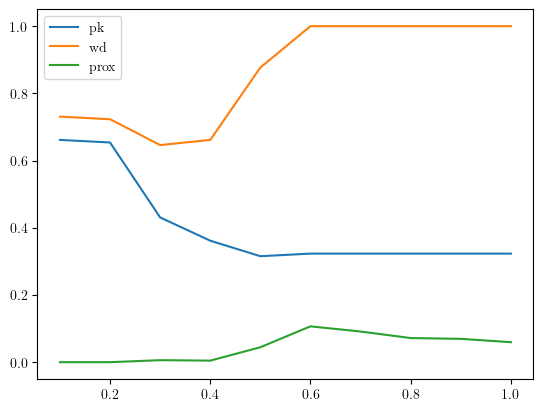

In [3]:
experimentation = Experiment(type="weighted_count")

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="fiction",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=4,
        diverse_keywords=False,
        keyword_diversity=0.0,
        max_graph_depth=5,
        start=300,
        num_samples=150,
        batch_size=10,
        coherence_threshold=0.7,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)

experimentation.run()

Running experiment set: 9Y6rJ
Running experiment: CoherenceExperiment(num_samples=500, start=300, dataset_type='ami', model_string='sentence-transformers/all-MiniLM-L12-v2', max_words_per_step=8, coherence_threshold=0.5, experiment_hash='iU2qR', batch_size=10, max_graph_depth=5, keyword_diversity=0.3, avg_k=-1, diverse_keywords=True, similar_keywords=True, ablation=False, scoring_factor=0.25, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: ami
TOTAL BATCHES: 50

.......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 .......... 16 .......... 17 .......... 18 .......... 19 .......... 20 .......... 21 .......... 22 .......... 23 .......... 24 .......... 25 .......... 26 .......... 27 .......... 28 .......... 29 .......... 30 .......... 31 .......... 32 .......... 33 .......... 34 .......... 35 .......

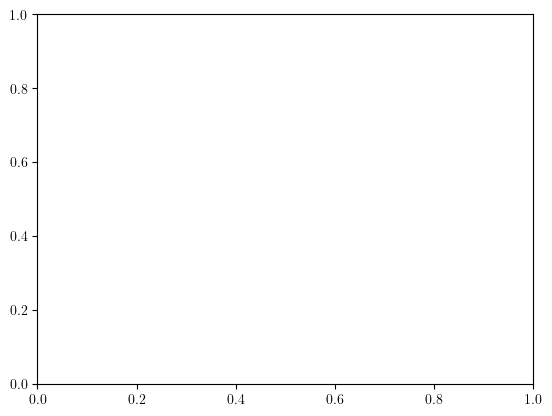

In [10]:
experimentation = Experiment(type="weighted_count")

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="ami",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=8,
        diverse_keywords=True,
        keyword_diversity=0.3,
        max_graph_depth=5,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.5,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="icsi",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=8,
        diverse_keywords=True,
        keyword_diversity=0.3,
        max_graph_depth=5,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.5,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)

experimentation.run()

### Collecting final results for weighted count wikisection...

Running experiment set: pBTTr
Running experiment: CoherenceExperiment(num_samples=1000, start=300, dataset_type='disease', model_string='sentence-transformers/LaBSE', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='5AeLX', batch_size=10, max_graph_depth=5, keyword_diversity=0.0, diverse_keywords=False, similar_keywords=True, ablation=False, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wikisection_disease
TOTAL BATCHES: 100

.......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 .......... 16 .......... 17 .......... 18 .......... 19 .......... 20 .......... 21 .......... 22 .......... 23 .......... 24 .......... 25 .......... 26 .......... 27 .......... 28 .......... 29 .......... 30 .......... 31 .......... 32 .......... 33 .......... 34 .......... 35 .......... 36 .......... 37

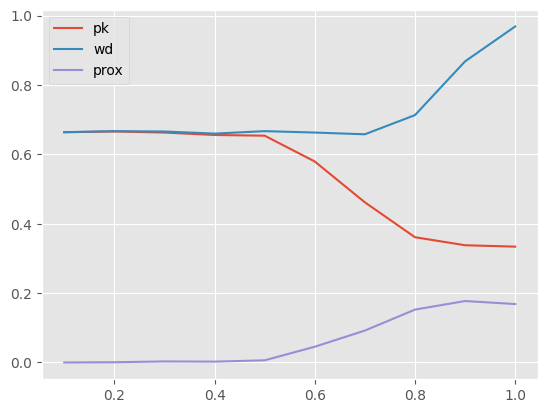

============= Predictions Summary =============
best pk: 0.3380281690140845, best prediction threshold: 0.9, proximity: 0.17716682316118937
P:[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

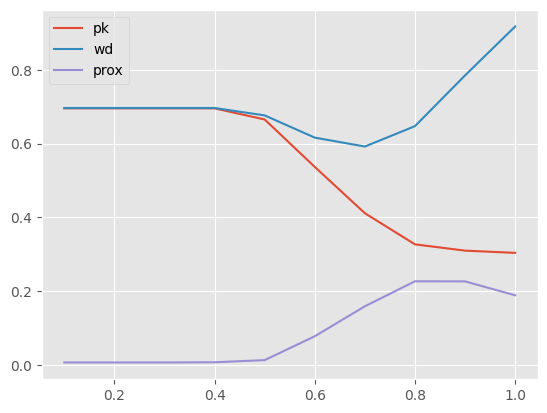

============= Predictions Summary =============
best pk: 0.30954773869346736, best prediction threshold: 0.9, proximity: 0.2261650047770915
P:[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

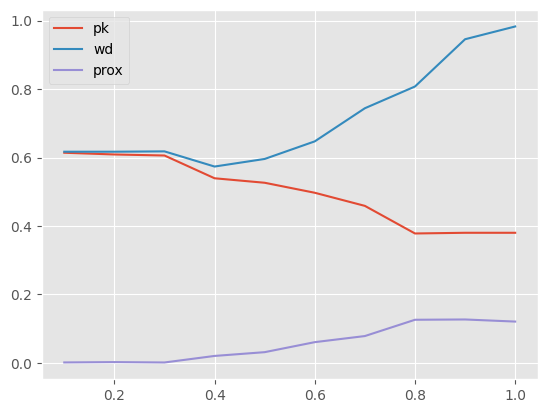

============= Predictions Summary =============
best pk: 0.3780241935483871, best prediction threshold: 0.8, proximity: 0.12588232974486374
P:[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

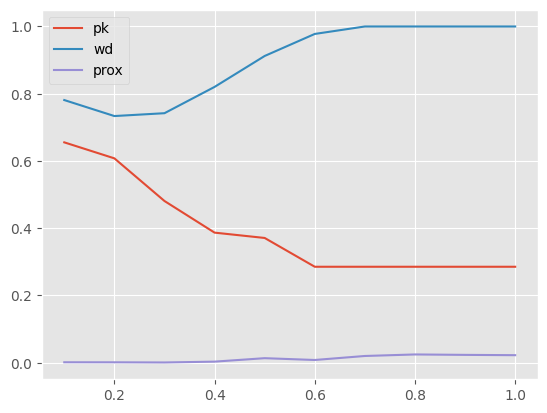

============= Predictions Summary =============
best pk: 0.2854122621564482, best prediction threshold: 0.8, proximity: 0.024605920799692427
P:[1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1

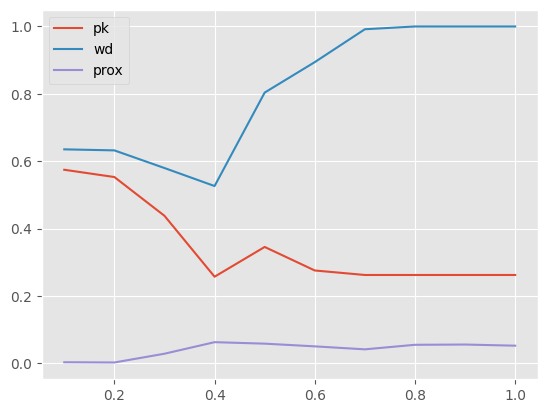

============= Predictions Summary =============
best pk: 0.2569373072970195, best prediction threshold: 0.4, proximity: 0.0625782227784731
P:[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

<Figure size 640x480 with 0 Axes>

In [73]:
experimentation = Experiment(type="weighted_count")

START = 300
NUM_SAMPLES = 1000
BATCH_SIZE = 10
DIVERSE_KEYWORDS = False
WORDS_PER_STEP = 4
KEYWORD_DIVERSITY = 0.0

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="disease",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5, # reducing graph depth because the wiki50k articles are very very long
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="clinical",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="fiction",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)
experimentation.run()

Running experiment set: 2WkR2
Running experiment: CoherenceExperiment(num_samples=1000, start=300, dataset_type='disease', model_string='sentence-transformers/LaBSE', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='Ri1WS', batch_size=10, max_graph_depth=5, keyword_diversity=0.0, diverse_keywords=False, similar_keywords=True, ablation=False, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wikisection_disease
TOTAL BATCHES: 100

.......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 .......... 16 .......... 17 .......... 18 .......... 19 .......... 20 .......... 21 .......... 22 .......... 23 .......... 24 .......... 25 .......... 26 .......... 27 .......... 28 .......... 29 .......... 30 .......... 31 .......... 32 .......... 33 .......... 34 .......... 35 .......... 36 .......... 37

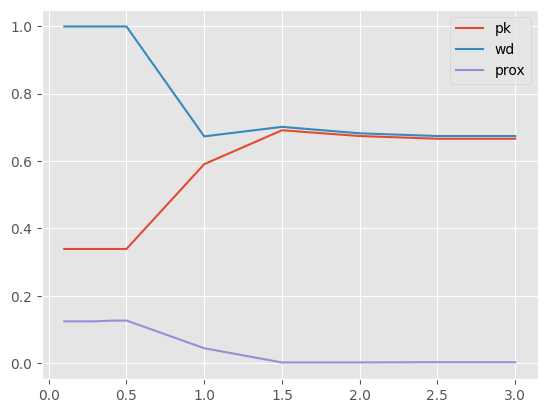

============= Predictions Summary =============
best pk: 0.33903420523138833, best prediction threshold: 0.5, proximity: 0.1268123711340206
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

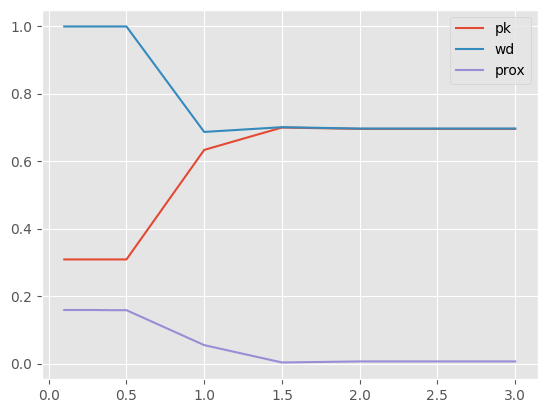

============= Predictions Summary =============
best pk: 0.3085427135678392, best prediction threshold: 0.3, proximity: 0.15861095426312818
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

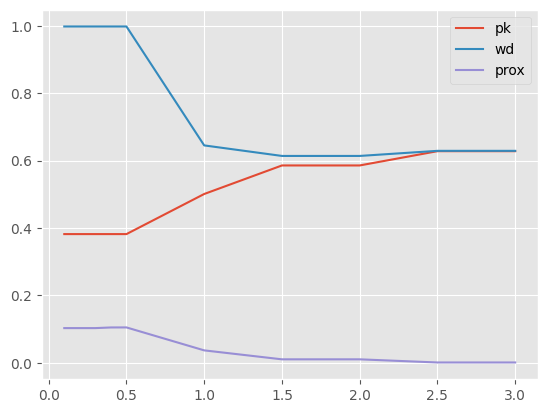

============= Predictions Summary =============
best pk: 0.38205645161290325, best prediction threshold: 0.5, proximity: 0.10516227519045
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

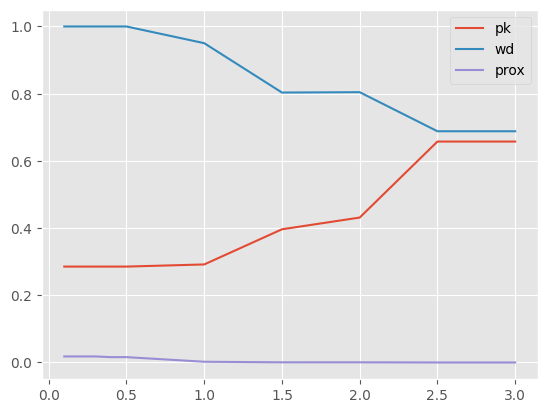

============= Predictions Summary =============
best pk: 0.2854122621564482, best prediction threshold: 0.3, proximity: 0.01795142555438226
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

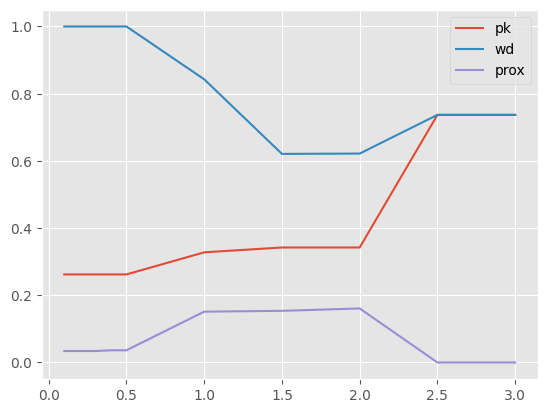

============= Predictions Summary =============
best pk: 0.3278520041109969, best prediction threshold: 1, proximity: 0.15126050420168066
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<Figure size 640x480 with 0 Axes>

In [76]:
experimentation = Experiment(type="chain_count")

START = 300
NUM_SAMPLES = 1000
BATCH_SIZE = 10
DIVERSE_KEYWORDS = False
WORDS_PER_STEP = 4
KEYWORD_DIVERSITY = 0.0

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="disease",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5, # reducing graph depth because the wiki50k articles are very very long
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="clinical",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="fiction",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)
experimentation.run()

# Choi

Running experiment set: yQEaf
Running experiment: CoherenceExperiment(num_samples=1000, start=300, dataset_type='choi_3_5', model_string='sentence-transformers/LaBSE', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='ylWFP', batch_size=25, max_graph_depth=5, keyword_diversity=0.0, diverse_keywords=False, similar_keywords=True, ablation=False, scoring_factor=2, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: choi_3_5
TOTAL BATCHES: 40

......................... 1 ......................... 2 ......................... 3 ......................... 4 ......................... 5 ......................... 6 ......................... 7 ......................... 8 ......................... 9 ......................... 10 ......................... 11 ......................... 12 ......................... 13 ......................... 14 ......................... 15 ......................... 16 ......................... 17 .................

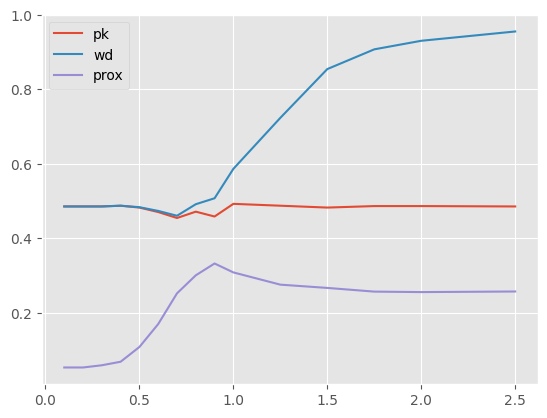

============= Predictions Summary =============
best pk: 0.45845845845845845, best prediction threshold: 0.9, proximity: 0.33210920820569945
P:[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1

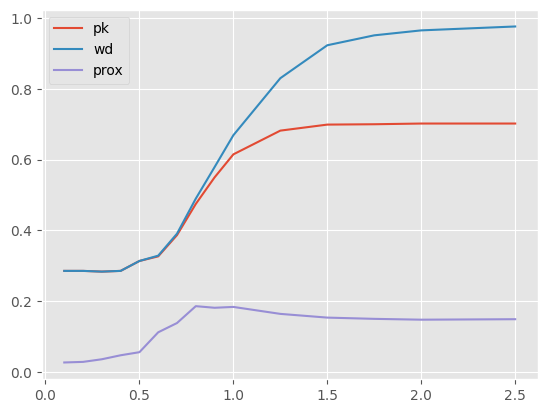

============= Predictions Summary =============
best pk: 0.3263263263263263, best prediction threshold: 0.6, proximity: 0.11177047135347055
P:[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

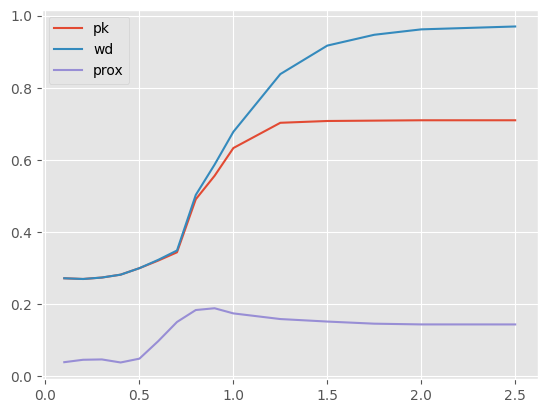

============= Predictions Summary =============
best pk: 0.3433433433433433, best prediction threshold: 0.7, proximity: 0.15000143777317693
P:[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

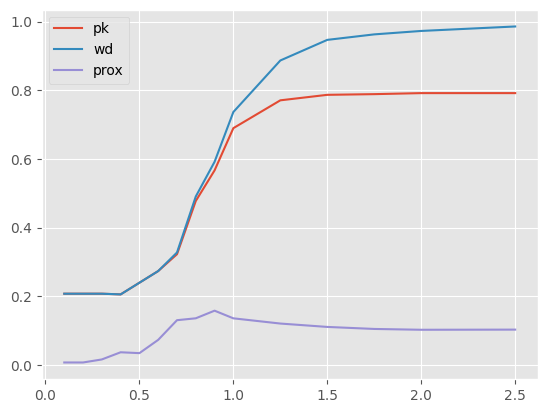

============= Predictions Summary =============
best pk: 0.20520520520520522, best prediction threshold: 0.4, proximity: 0.03654970760233918
P:[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0

<Figure size 640x480 with 0 Axes>

In [19]:
experimentation = Experiment(type="weighted_count")

START = 300
NUM_SAMPLES = 1000
BATCH_SIZE = 25
DIVERSE_KEYWORDS = False
WORDS_PER_STEP = 4
KEYWORD_DIVERSITY = 0.0

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_3_5",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_3_11",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_6_8",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_9_11",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.run()

# Manifesto

Running experiment set: dihDf
Running experiment: CoherenceExperiment(num_samples=500, start=300, dataset_type='manifesto', model_string='sentence-transformers/LaBSE', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='yEPFi', batch_size=10, max_graph_depth=5, keyword_diversity=0.0, diverse_keywords=False, similar_keywords=True, ablation=False, scoring_factor=2, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: manifesto
TOTAL BATCHES: 50

.......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 .......... 16 .......... 17 .......... 18 .......... 19 .......... 20 .......... 21 .......... 22 .......... 23 .......... 24 .......... 25 .......... 26 .......... 27 .......... 28 .......... 29 .......... 30 .......... 31 .......... 32 .......... 33 .......... 34 .......... 35 .......... 36 .....

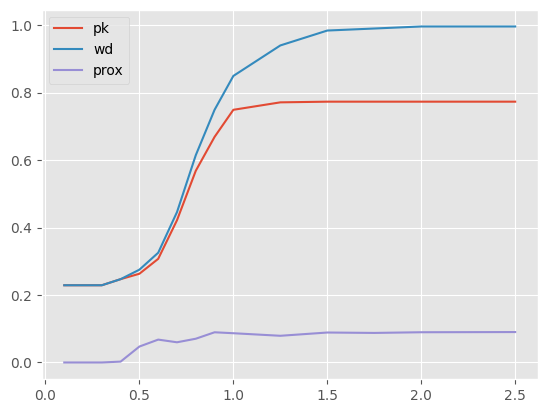

============= Predictions Summary =============
best pk: 0.26305220883534136, best prediction threshold: 0.5, proximity: 0.0472608024691358
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<Figure size 640x480 with 0 Axes>

In [28]:
experimentation = Experiment(type="weighted_count")

START = 0
NUM_SAMPLES = 500
BATCH_SIZE = 10
DIVERSE_KEYWORDS = False
WORDS_PER_STEP = 4
KEYWORD_DIVERSITY = 0.0

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="manifesto",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.run()

Running experiment set: BQz1E
Running experiment: CoherenceExperiment(num_samples=1000, start=300, dataset_type='ami', model_string='sentence-transformers/LaBSE', max_words_per_step=6, coherence_threshold=0.5, experiment_hash='gnnQA', batch_size=50, max_graph_depth=5, keyword_diversity=0.3, avg_k=15, diverse_keywords=True, similar_keywords=True, ablation=False, scoring_factor=2, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: ami
TOTAL BATCHES: 20

.................................................. 1 .................................................. 2 .................................................. 3 .................................................. 4 .................................................. 5 .................................................. 6 .................................................. 7 .................................................. 8 .................................................. 9 .........................

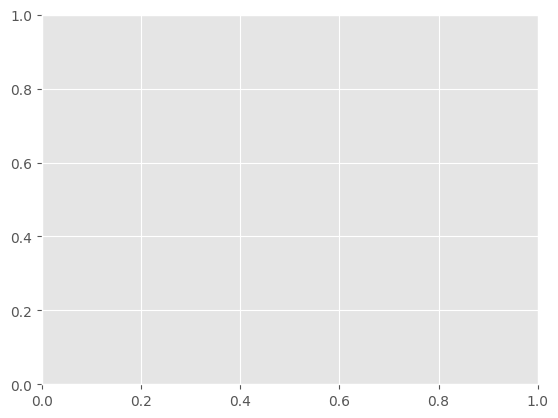

In [6]:
experimentation = Experiment(type="weighted_count")

START = 300
NUM_SAMPLES = 1000
BATCH_SIZE = 50
DIVERSE_KEYWORDS = True
WORDS_PER_STEP = 6
KEYWORD_DIVERSITY = 0.3
COHERENCE_THRESHOLD = 0.5

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="ami",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=COHERENCE_THRESHOLD,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True,
        avg_k=15,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="icsi",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=COHERENCE_THRESHOLD,
        scoring_factor=2,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True,
        avg_k=3,
    )
)

experimentation.run()

## ====== THESIS EVALUATIONS ======

## NO GITS

Running experiment set: S1qT9
Running experiment: CoherenceExperiment(num_samples=1000, start=300, dataset_type='disease', model_string='sentence-transformers/LaBSE', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='20cag', batch_size=2, max_graph_depth=5, keyword_diversity=0.0, diverse_keywords=False, similar_keywords=True, ablation=False, scoring_factor=0.75, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wikisection_disease


/Users/mac/miniforge3/envs/phd/lib/python3.8/site-packages/transformers/utils/generic.py:319: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


TOTAL BATCHES: 500

.. 1 .. 2 .. 3 .. 4 .. 5 .. 6 .. 7 .. 8 .. 9 .. 10 .. 11 .. 12 .. 13 .. 14 .. 15 .. 16 .. 17 .. 18 .. 19 .. 20 .. 21 .. 22 .. 23 .. 24 .. 25 .. 26 .. 27 .. 28 .. 29 .. 30 .. 31 .. 32 .. 33 .. 34 .. 35 .. 36 .. 37 .. 38 .. 39 .. 40 .. 41 .. 42 .. 43 .. 44 .. 45 .. 46 .. 47 .. 48 .. 49 .. 50 .. 51 .. 52 .. 53 .. 54 .. 55 .. 56 .. 57 .. 58 .. 59 .. 60 .. 61 .. 62 .. 63 .. 64 .. 65 .. 66 .. 67 .. 68 .. 69 .. 70 .. 71 .. 72 .. 73 .. 74 .. 75 .. 76 .. 77 .. 78 .. 79 .. 80 .. 81 .. 82 .. 83 .. 84 .. 85 .. 86 .. 87 .. 88 .. 89 .. 90 .. 91 .. 92 .. 93 .. 94 .. 95 .. 96 .. 97 .. 98 .. 99 .. 100 .. 101 .. 102 .. 103 .. 104 .. 105 .. 106 .. 107 .. 108 .. 109 .. 110 .. 111 .. 112 .. 113 .. 114 .. 115 .. 116 .. 117 .. 118 .. 119 .. 120 .. 121 .. 122 .. 123 .. 124 .. 125 .. 126 .. 127 .. 128 .. 129 .. 130 .. 131 .. 132 .. 133 .. 134 .. 135 .. 136 .. 137 .. 138 .. 139 .. 140 .. 141 .. 142 .. 143 .. 144 .. 145 .. 146 .. 147 .. 148 .. 149 .. 150 .. 151 .. 152 .. 153 .. 154 .. 155 .. 

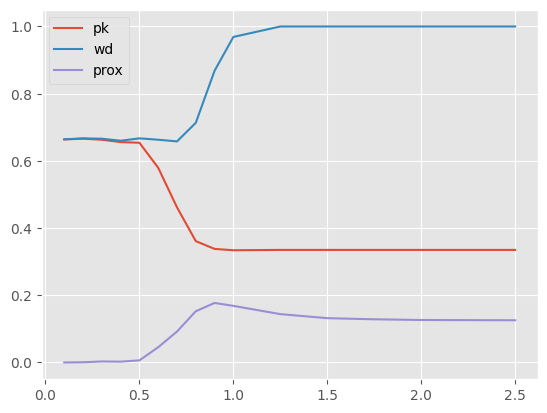

============= Predictions Summary =============
best pk: 0.3380281690140845, best prediction threshold: 0.9, proximity: 0.17716682316118937
P:[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

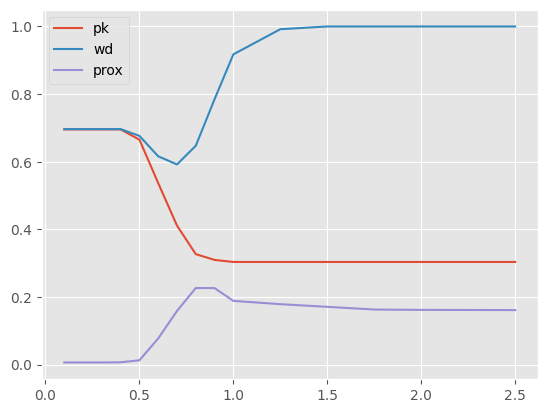

============= Predictions Summary =============
best pk: 0.30954773869346736, best prediction threshold: 0.9, proximity: 0.2261650047770915
P:[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

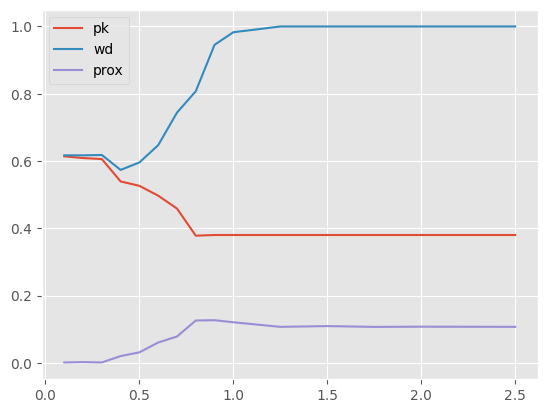

============= Predictions Summary =============
best pk: 0.3780241935483871, best prediction threshold: 0.8, proximity: 0.12588232974486374
P:[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

ValueError: Segmentations have unequal length

<Figure size 640x480 with 0 Axes>

In [3]:
experimentation = Experiment(type="weighted_count")

START = 300
NUM_SAMPLES = 1000
BATCH_SIZE = 2
DIVERSE_KEYWORDS = False
WORDS_PER_STEP = 4
KEYWORD_DIVERSITY = 0.0

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="disease",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5, # reducing graph depth because the wiki50k articles are very very long
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="clinical",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="fiction",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_3_5",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_3_11",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_6_8",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_9_11",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)
experimentation.run()

## WITH GITS

Running experiment set: S1qT9
Running experiment: CoherenceExperiment(num_samples=500, start=300, dataset_type='disease', model_string='sentence-transformers/LaBSE', max_words_per_step=6, coherence_threshold=0.7, experiment_hash='apYSt', batch_size=50, max_graph_depth=5, keyword_diversity=0.4, diverse_keywords=False, similar_keywords=True, ablation=False, scoring_factor=0.75, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wikisection_disease
TOTAL BATCHES: 10

.................................................. 1 .................................................. 2 .................................................. 3 .................................................. 4 .................................................. 5 .................................................. 6 .................................................. 7 .................................................. 8 .................................................. 9 ............

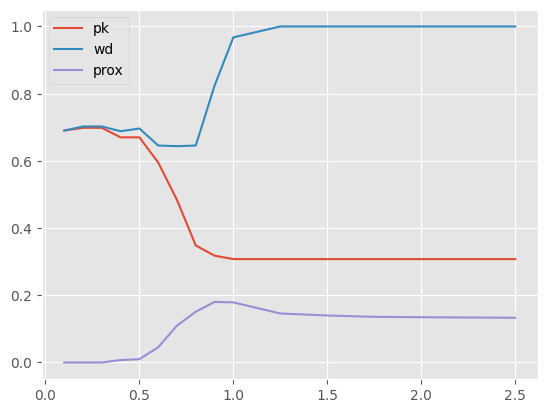

============= Predictions Summary =============
best pk: 0.3076923076923077, best prediction threshold: 1, proximity: 0.17884445548379974
P:[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1

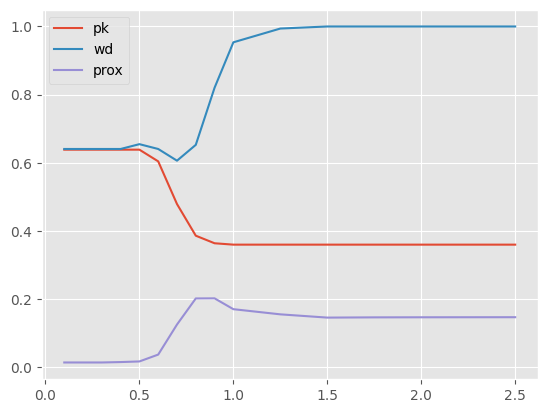

============= Predictions Summary =============
best pk: 0.36363636363636365, best prediction threshold: 0.9, proximity: 0.20193602027080526
P:[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1

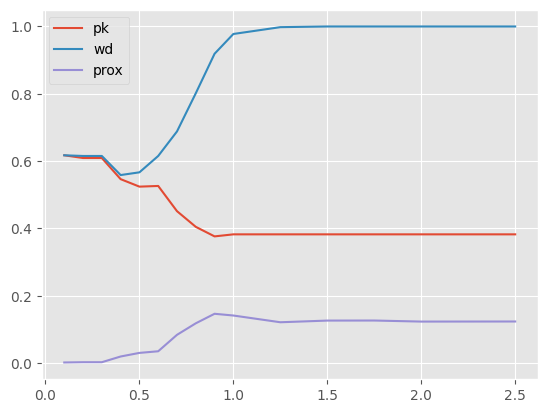

============= Predictions Summary =============
best pk: 0.3765182186234818, best prediction threshold: 0.9, proximity: 0.1466577984702361
P:[1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 

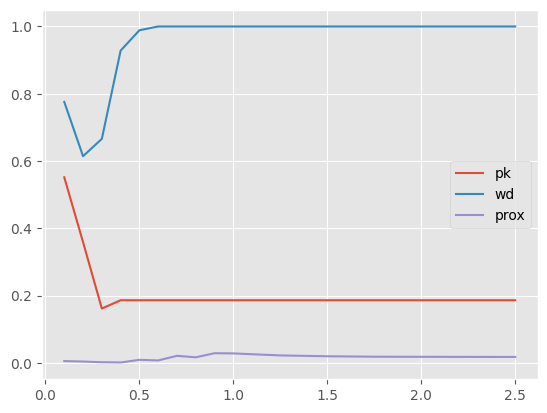

============= Predictions Summary =============
best pk: 0.1860986547085202, best prediction threshold: 0.9, proximity: 0.028611791938997818
P:[1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1

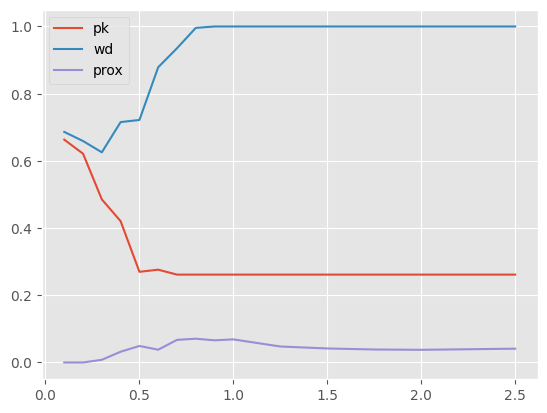

============= Predictions Summary =============
best pk: 0.2615062761506276, best prediction threshold: 0.8, proximity: 0.07075471698113207
P:[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

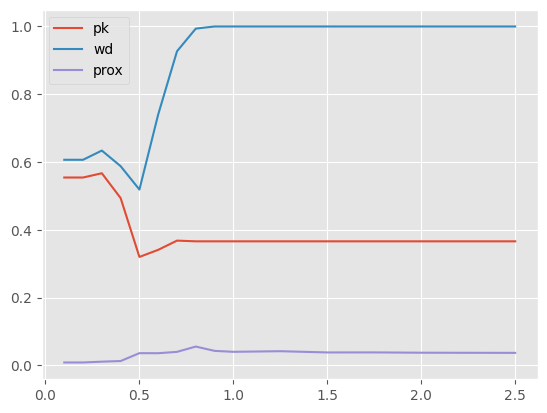

============= Predictions Summary =============
best pk: 0.3200836820083682, best prediction threshold: 0.5, proximity: 0.03616898148148148
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

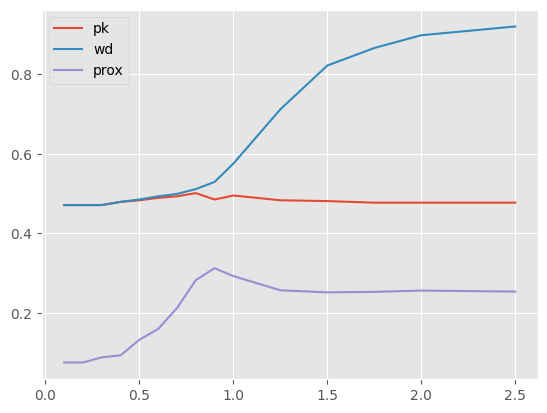

============= Predictions Summary =============
best pk: 0.4849699398797595, best prediction threshold: 0.9, proximity: 0.3123863963574848
P:[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 

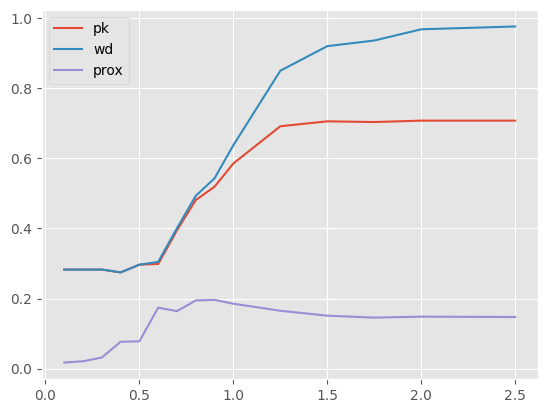

============= Predictions Summary =============
best pk: 0.2985971943887776, best prediction threshold: 0.6, proximity: 0.17406393091056627
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

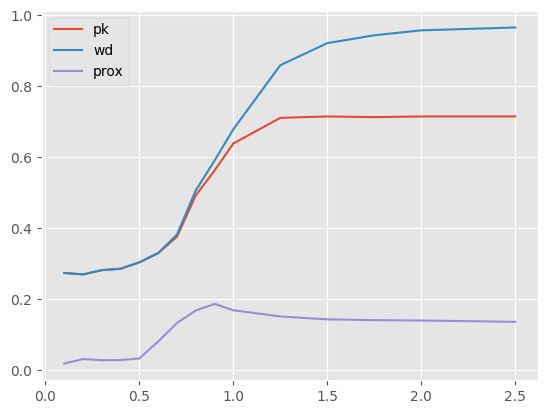

============= Predictions Summary =============
best pk: 0.27054108216432865, best prediction threshold: 0.2, proximity: 0.032206119162640906
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

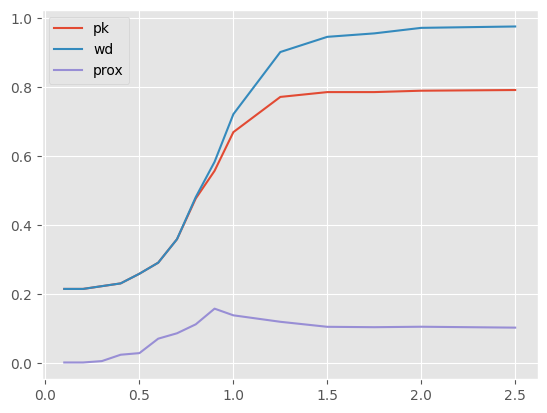

============= Predictions Summary =============
best pk: 0.23046092184368738, best prediction threshold: 0.4, proximity: 0.023472222222222228
P:[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

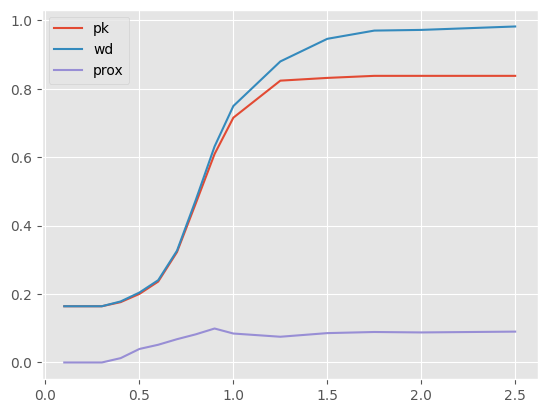

============= Predictions Summary =============
best pk: 0.20040080160320642, best prediction threshold: 0.5, proximity: 0.03950617283950617
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<Figure size 640x480 with 0 Axes>

In [4]:
experimentation = Experiment(type="weighted_count")

START = 300
NUM_SAMPLES = 500
BATCH_SIZE = 50
DIVERSE_KEYWORDS = False
WORDS_PER_STEP = 6
KEYWORD_DIVERSITY = 0.4
SCORING_FACTOR = (3/4)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="disease",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=SCORING_FACTOR,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5, # reducing graph depth because the wiki50k articles are very very long
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=SCORING_FACTOR,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="clinical",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=SCORING_FACTOR,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="fiction",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=SCORING_FACTOR,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=START,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=SCORING_FACTOR,
        print_metrics_summary=True,
        print_predictions_summary=True,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_3_5",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_3_11",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=SCORING_FACTOR,
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_6_8",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=SCORING_FACTOR,
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_9_11",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=SCORING_FACTOR,
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="manifesto",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=SCORING_FACTOR,
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)
experimentation.run()

Running experiment set: S1qT9
Running experiment: CoherenceExperiment(num_samples=1000, start=300, dataset_type='choi_3_5', model_string='sentence-transformers/LaBSE', max_words_per_step=4, coherence_threshold=0.7, experiment_hash='fXSpd', batch_size=2, max_graph_depth=5, keyword_diversity=0.0, diverse_keywords=False, similar_keywords=True, ablation=False, scoring_factor=0.75, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: choi_3_5
TOTAL BATCHES: 500

.. 1 .. 2 .. 3 .. 4 .. 5 .. 6 .. 7 .. 8 .. 9 .. 10 .. 11 .. 12 .. 13 .. 14 .. 15 .. 16 .. 17 .. 18 .. 19 .. 20 .. 21 .. 22 .. 23 .. 24 .. 25 .. 26 .. 27 .. 28 .. 29 .. 30 .. 31 .. 32 .. 33 .. 34 .. 35 .. 36 .. 37 .. 38 .. 39 .. 40 .. 41 .. 42 .. 43 .. 44 .. 45 .. 46 .. 47 .. 48 .. 49 .. 50 .. 51 .. 52 .. 53 .. 54 .. 55 .. 56 .. 57 .. 58 .. 59 .. 60 .. 61 .. 62 .. 63 .. 64 .. 65 .. 66 .. 67 .. 68 .. 69 .. 70 .. 71 .. 72 .. 73 .. 74 .. 75 .. 76 .. 77 .. 78 .. 79 .. 80 .. 81 .. 82 .. 83 .. 84 .. 

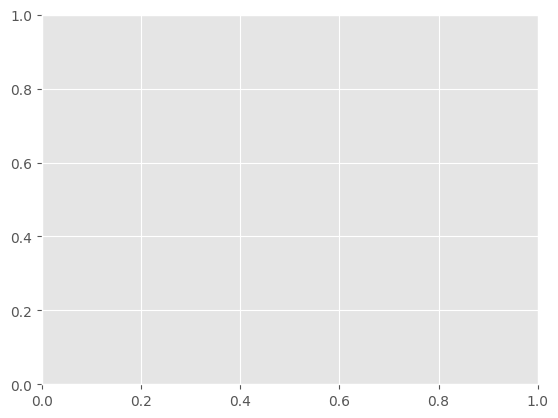

In [6]:
# CHOI NO GITS
experimentation = Experiment(type="weighted_count")

START = 300
NUM_SAMPLES = 1000
BATCH_SIZE = 2
DIVERSE_KEYWORDS = False
WORDS_PER_STEP = 4
KEYWORD_DIVERSITY = 0.0

experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_3_5",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_3_11",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_6_8",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)


experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="choi_9_11",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=(3/4),
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)
experimentation.run()

Running experiment set: S1qT9
Running experiment: CoherenceExperiment(num_samples=500, start=300, dataset_type='disease', model_string='sentence-transformers/LaBSE', max_words_per_step=6, coherence_threshold=0.7, experiment_hash='apYSt', batch_size=50, max_graph_depth=5, keyword_diversity=0.4, diverse_keywords=False, similar_keywords=True, ablation=False, scoring_factor=0.75, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wikisection_disease
TOTAL BATCHES: 10

.................................................. 1 .................................................. 2 .................................................. 3 .................................................. 4 .................................................. 5 .................................................. 6 .................................................. 7 .................................................. 8 .................................................. 9 ............

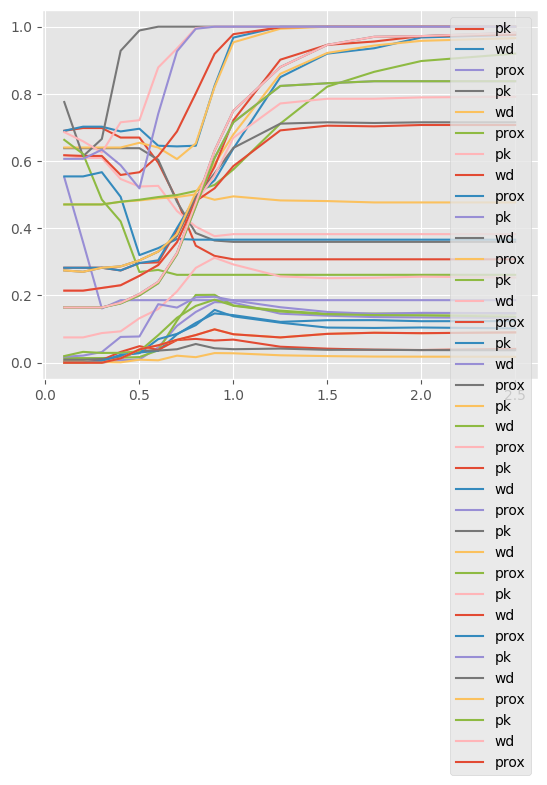

In [5]:
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="manifesto",
        model_string="sentence-transformers/LaBSE",
        max_words_per_step=WORDS_PER_STEP,
        diverse_keywords=DIVERSE_KEYWORDS,
        keyword_diversity=KEYWORD_DIVERSITY,
        max_graph_depth=5,
        start=300,
        num_samples=NUM_SAMPLES,
        batch_size=BATCH_SIZE,
        coherence_threshold=0.7,
        scoring_factor=SCORING_FACTOR,
        print_metrics_summary=True,
        print_predictions_summary=True,
        avg_k=2,
    )
)
experimentation.run()

# === ABLATION COHERENCE ===

Running experiment set: 9Y6rJ
Running experiment: CoherenceExperiment(num_samples=500, start=300, dataset_type='wiki50k', model_string='sentence-transformers/all-MiniLM-L12-v2', max_words_per_step=3, coherence_threshold=0.7, experiment_hash='Gi42j', batch_size=10, max_graph_depth=5, keyword_diversity=0.0, avg_k=-1, diverse_keywords=False, similar_keywords=True, ablation=False, scoring_factor=0.25, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wiki50k
TOTAL BATCHES: 50

.......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 .......... 16 .......... 17 .......... 18 .......... 19 .......... 20 .......... 21 .......... 22 .......... 23 .......... 24 .......... 25 .......... 26 .......... 27 .......... 28 .......... 29 .......... 30 .......... 31 .......... 32 .......... 33 .......... 34 .......... 3

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

============= Predictions Summary =============
best pk: 0.402834008097166, best prediction threshold: 0.8, proximity: 0.11980618611442984
P:[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

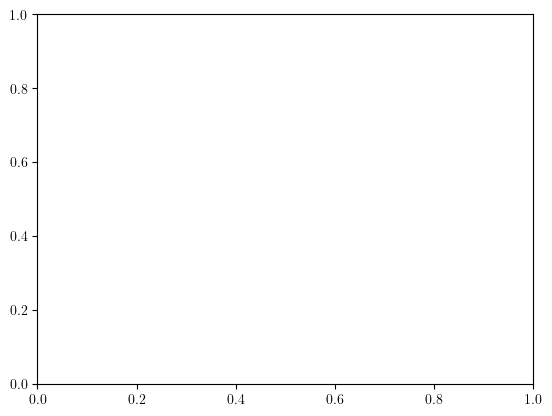

In [6]:
experimentation = Experiment(type="weighted_count")

# no diverse keywords - coherence threshold 0.7
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=3,
        diverse_keywords=False,
        keyword_diversity=0.0,
        max_graph_depth=5,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.7,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)

# no diverse keywords - coherence threshold 0.5
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=3,
        diverse_keywords=False,
        keyword_diversity=0.0,
        max_graph_depth=5,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.5,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)

# no diverse keywords - coherence threshold 0.3
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=3,
        diverse_keywords=False,
        keyword_diversity=0.0,
        max_graph_depth=5,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.3,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)


experimentation.run()

Running experiment set: 9Y6rJ
Running experiment: CoherenceExperiment(num_samples=500, start=300, dataset_type='wiki50k', model_string='sentence-transformers/all-MiniLM-L12-v2', max_words_per_step=4, coherence_threshold=0.5, experiment_hash='UWO6B', batch_size=10, max_graph_depth=5, keyword_diversity=0.3, avg_k=-1, diverse_keywords=True, similar_keywords=True, ablation=False, scoring_factor=0.25, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wiki50k
TOTAL BATCHES: 50

.......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 .......... 16 .......... 17 .......... 18 .......... 19 .......... 20 .......... 21 .......... 22 .......... 23 .......... 24 .......... 25 .......... 26 .......... 27 .......... 28 .......... 29 .......... 30 .......... 31 .......... 32 .......... 33 .......... 34 .......... 35

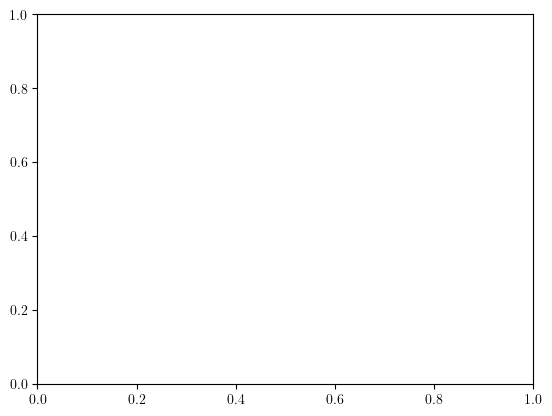

In [7]:
experimentation = Experiment(type="weighted_count")

# with diverse keywords - 4 keywords
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=4,
        diverse_keywords=True,
        keyword_diversity=0.3,
        max_graph_depth=5,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.5,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)


# with diverse keywords - 6 keywords
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=6,
        diverse_keywords=True,
        keyword_diversity=0.3,
        max_graph_depth=5,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.5,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)


# with diverse keywords - 8 keywords
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=8,
        diverse_keywords=True,
        keyword_diversity=0.3,
        max_graph_depth=5,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.5,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)

experimentation.run()

Running experiment set: 9Y6rJ
Running experiment: CoherenceExperiment(num_samples=500, start=300, dataset_type='wiki50k', model_string='sentence-transformers/all-MiniLM-L12-v2', max_words_per_step=8, coherence_threshold=0.5, experiment_hash='pv1AJ', batch_size=10, max_graph_depth=5, keyword_diversity=0.3, avg_k=-1, diverse_keywords=True, similar_keywords=True, ablation=False, scoring_factor=0.25, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wiki50k
TOTAL BATCHES: 50

.......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 .......... 16 .......... 17 .......... 18 .......... 19 .......... 20 .......... 21 .......... 22 .......... 23 .......... 24 .......... 25 .......... 26 .......... 27 .......... 28 .......... 29 .......... 30 .......... 31 .......... 32 .......... 33 .......... 34 .......... 35

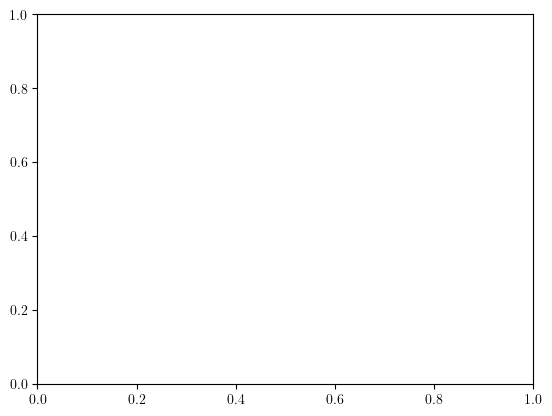

In [8]:
experimentation = Experiment(type="weighted_count")

# graph depth 5 diverse keywords - 8 keywords
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=8,
        diverse_keywords=True,
        keyword_diversity=0.3,
        max_graph_depth=5,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.5,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)

# graph depth 6 diverse keywords - 8 keywords
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=8,
        diverse_keywords=True,
        keyword_diversity=0.3,
        max_graph_depth=6,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.5,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)

# graph depth 5 diverse keywords - 8 keywords
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=8,
        diverse_keywords=True,
        keyword_diversity=0.3,
        max_graph_depth=7,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.5,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)

experimentation.run()

Running experiment set: 9Y6rJ
Running experiment: CoherenceExperiment(num_samples=500, start=300, dataset_type='wiki50k', model_string='sentence-transformers/all-MiniLM-L12-v2', max_words_per_step=8, coherence_threshold=0.5, experiment_hash='WeJpq', batch_size=10, max_graph_depth=5, keyword_diversity=0.3, avg_k=-1, diverse_keywords=True, similar_keywords=True, ablation=False, scoring_factor=0.25, print_metrics_summary=True, print_predictions_summary=True, show_graphs=True)
Using dataset: wiki50k
TOTAL BATCHES: 50

.......... 1 .......... 2 .......... 3 .......... 4 .......... 5 .......... 6 .......... 7 .......... 8 .......... 9 .......... 10 .......... 11 .......... 12 .......... 13 .......... 14 .......... 15 .......... 16 .......... 17 .......... 18 .......... 19 .......... 20 .......... 21 .......... 22 .......... 23 .......... 24 .......... 25 .......... 26 .......... 27 .......... 28 .......... 29 .......... 30 .......... 31 .......... 32 .......... 33 .......... 34 .......... 35

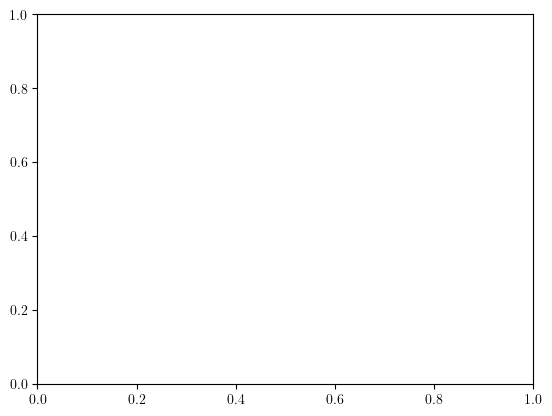

In [9]:
experimentation = Experiment(type="weighted_count")

# graph depth 5 diverse keywords - 8 keywords 0.3 diversity
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=8,
        diverse_keywords=True,
        keyword_diversity=0.3,
        max_graph_depth=5,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.5,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)

# graph depth 6 diverse keywords - 8 keywords 0.5 diversity
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=8,
        diverse_keywords=True,
        keyword_diversity=0.5,
        max_graph_depth=5,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.5,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)

# graph depth 5 diverse keywords - 8 keywords 0.7 diversity
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="wiki50k",
        model_string="sentence-transformers/all-MiniLM-L12-v2",
        max_words_per_step=8,
        diverse_keywords=True,
        keyword_diversity=0.7,
        max_graph_depth=5,
        start=300,
        num_samples=500,
        batch_size=10,
        coherence_threshold=0.5,
        scoring_factor=0.25,
        print_metrics_summary=True,
        print_predictions_summary=True,
        show_graphs=True
    )
)

experimentation.run()